In [1]:
import pandas as pd
import json
import random

## 1. CEX Goldstandard dataset Overview

* https://zenodo.org/records/10535653
* There are 112 English papers in 27 categories. 

In [7]:
pdf_df = pd.read_csv("pdf_files_info.csv")
references_data = json.load(open("all_references.json", "r", encoding="utf-8"))

print('CEX Goldstandard dataset:')
print(f"Total documents: {len(pdf_df)}")
print(f"Total categories: {len(pdf_df['category'].unique())}")
print(f"Total pages: {pdf_df['page_count'].sum()}")
# if references key exists: 
print(f"Total references: {sum(len(data['references']) if 'references' in data else 0 for data in references_data.values())}")

CEX Goldstandard dataset:
Total documents: 111
Total categories: 27
Total pages: 1566
Total references: 5139


In [10]:
def get_sample_data(pdf_df, references_data, sample_size=5):
    if not pdf_df.empty:
       print(f'\n=== SAMPLE PDF DATA ===')
       print(pdf_df.sample(sample_size).to_string(index=False))
    
    if references_data:
       print(f'\n=== SAMPLE REFERENCES DATA ===')
       sample_keys = list(references_data.keys())[:sample_size]
       for i, file_id in enumerate(sample_keys):
           ref_data = references_data[file_id]
           print(f"Paper {i+1} (ID: {file_id}):")
           print(f"  Number of references: {len(ref_data['references'])}")
           print(f"  First few references:")
           for j, ref in enumerate(ref_data['references'][:3]):
               print(f"    {j+1}. {ref}")
           if len(ref_data['references']) > 3:
               print(f"    ... and {len(ref_data['references']) - 3} more")
           print()

get_sample_data(pdf_df, references_data)


=== SAMPLE PDF DATA ===
       file_id           filename    category                                  file_path  page_count                                                                                                                                                                                                                                                            title  publication_year                                   doi                                                                                                        xml_title                                       journal               publisher
   SOC-SCI_101    SOC-SCI_101.pdf     SOC-SCI    benchmarks/cex/all_pdfs/SOC-SCI_101.pdf          26                       Michieletto, M., Adedayo, O., & Mukanya, V. (2019). African Housing Renaissance: The Case of Gacuriro Valley Satellite Settlements, Kigali, Rwanda. Urban Planning, 4(3), 265-290. doi:https://doi.org/10.17645/up.v4i3.2210 (Open Access)            2019.0 ht

<Axes: ylabel='Frequency'>

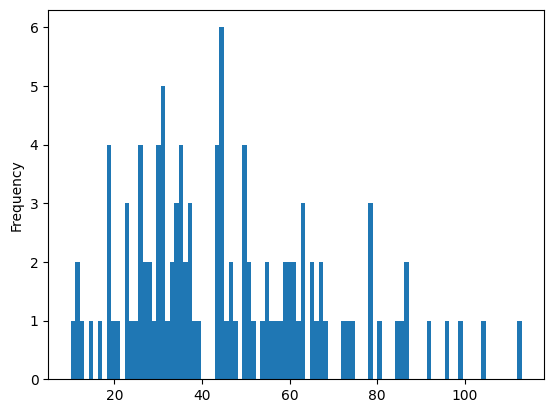

In [11]:
pdf_df['reference_count'] = pdf_df['file_id'].map(lambda x: len(references_data[str(x)]['references']))
pdf_df['reference_count'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

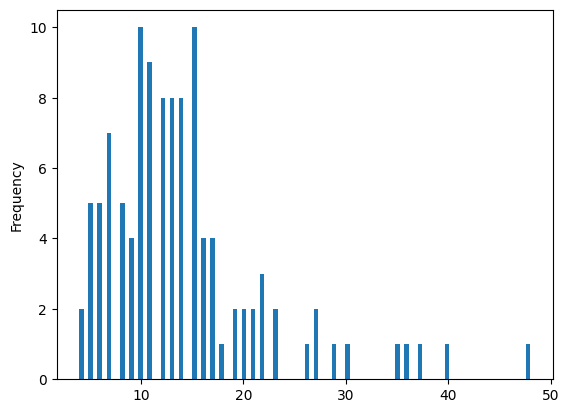

In [12]:
pdf_df['page_count'].plot(kind='hist', bins=100)

# Checking Sliver data for Original ref string


In [5]:
gt_file = 'all_references.json'
sliver_file = 'all_references_sliver.json'
gt_data = json.load(open(gt_file, 'r', encoding='utf-8'))
random.sample(list(gt_data.keys()), 5)

['DEN_36', 'ENG_49', 'CHEM_24', 'MAT-SCI_65', 'MAT-SCI_67']

In [11]:
import random


def check_random_ref_string(n=5, n_ref=5):
    gt_file = 'all_references.json'
    sliver_file = 'all_references_sliver.json'
    gt_data = json.load(open(gt_file, 'r', encoding='utf-8'))
    sliver_data = json.load(open(sliver_file, 'r', encoding='utf-8'))

    # select n random file names from the gold standard
    random_files_names = random.sample(list(gt_data.keys()), n)
    for file_name in random_files_names:
        # file_id = int(file_name)
        gt_references = gt_data[file_name]['references']
        sliver_references = sliver_data[file_name]['references']
        
        # Check if the sliver references are a subset of the gold standard references
        if len(sliver_references) == len(gt_references):
            print(f"File {file_name} has the same number of references in both gold standard and sliver.")
        else:
            print(f"File {file_name} has a different number of references in gold standard and sliver.")
        
        print(f"checking random reference string to see if match")
        ref_id = random.sample(list(range(len(gt_references))), n_ref)
        for i in ref_id:
            print("--------------------------------")
            print(f"gold standard reference: {gt_references[i]}")
            print(f"sliver reference: {sliver_references[i]}")
            # print("--------------------------------")
        print("================================================")


check_random_ref_string()

        

File MAT-SCI_65 has the same number of references in both gold standard and sliver.
checking random reference string to see if match
--------------------------------
gold standard reference: A Kokalj, S Peljhan, M Finšgar, I Milošev. What determines the inhibition effectiveness of ATA, BTAH, and BTAOH corrosion inhibitors on copper?. J. Am. Chem. Soc.. 2010. Vol. 132
sliver reference: A. Kokalj, S. Peljhan, M. Finšgar, I. Milošev, What determines the inhibition effectiveness of ATA, BTAH, and BTAOH corrosion inhibitors on copper? J. Am. Chem. Soc. 132 (2010) 16657–16668.
--------------------------------
gold standard reference: C-C Li, X-Y Guo, S Shen, P Song, T Xu, Y Wen, H-F Yang. Adsorption and corrosion inhibition of phytic acid calcium on the copper surface in 3 wt% NaCl solution. Corros. Sci.. 2014. Vol. 83
sliver reference: C.-C. Li, X.-Y. Guo, S. Shen, P. Song, T. Xu, Y. Wen, H.-F. Yang, Adsorption and corrosion inhibition of phytic acid calcium on the copper surface in 3 wt% N

# RAG experiment